In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
dataset = pd.read_csv('weatherHistory.csv')

In [5]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
dataset['Formatted Date'] = pd.to_datetime(dataset['Formatted Date'], utc=True)
dataset['day_of_year'] = dataset['Formatted Date'].dt.dayofyear
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day_of_year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91


In [7]:
dataset = dataset.set_index('Formatted Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),day_of_year
Formatted Date,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000,365
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000,1
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167,2
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833,3
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833,4


In [8]:
Temp_and_DofY = dataset[['Temperature (C)', 'day_of_year']].copy()
Temp_and_DofY.head(11)

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4
2006-01-05 00:00:00+00:00,2.703935,5
2006-01-06 00:00:00+00:00,2.550463,6
2006-01-07 00:00:00+00:00,0.877083,7
2006-01-08 00:00:00+00:00,-1.231713,8


In [9]:
Temp_and_DofY.groupby('day_of_year')
Temp_and_DofY.head()

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4


In [10]:
X = Temp_and_DofY['day_of_year']
Y = Temp_and_DofY['Temperature (C)']

Text(0.5, 0, 'day of year')

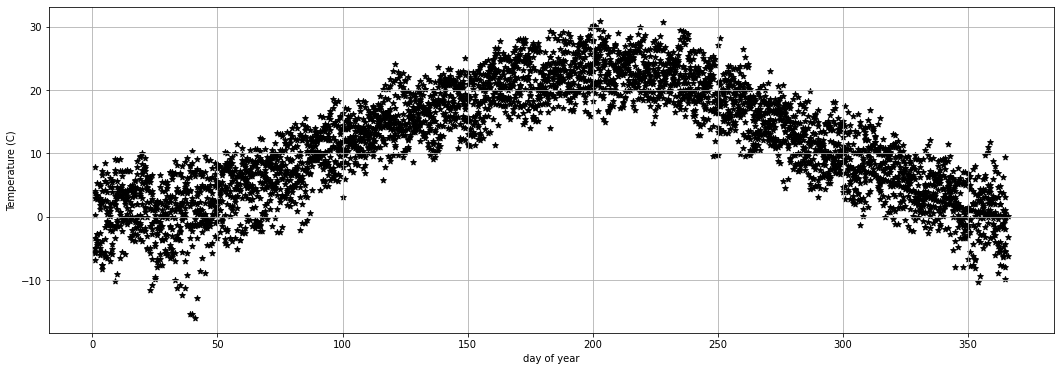

In [11]:
plt.figure(figsize=(18,6)) 
plt.scatter(X, Y, c='0',marker='*')
plt.grid()

plt.ylabel('Temperature (C)')
plt.xlabel('day of year')

In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [14]:


X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 42)


In [44]:
class Perceptron:
    def __init__(self,learning_rate, n_iters):
        self.lr=learning_rate
        self.n_iters=n_iters
        self.w = np.random.rand(1,1)
        self.b = np.random.rand(1,1)
        self.Error = []
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
        for j in range(self.n_iters):
            
            for i in range(self.X_train.shape[0]):
                y_pred = np.matmul(self.X_train[i], self.w) + self.b
                e = np.mean(self.Y_train[i] - y_pred)
                
                self.w += self.lr * self.X_train[i]* e
                self.b += self.lr*e

                self.Error.append(np.abs(e))
                
        np.save('weight', self.w)
        np.save('baias', self.b)
                
        return self.Error
            
    def predict(self,X_test):
        w = np.load('weight.npy')
        b = np.load('baias.npy')
        y_predict = np.matmul(X_test, w)+b
                    
        return y_predict
    

    
    def evaluate(self,X_test,Y_test):
        w = np.load('weight.npy')
        b = np.load('baias.npy')
        Y_pred = np.matmul(X_test, w) + b
        absolute_error = np.abs(Y_pred - Y_test)
        evaluation = np.mean(absolute_error)
        return evaluation
    


In [45]:
model = Perceptron(learning_rate=0.000001, n_iters=100)
Error= model.fit(X_train, Y_train)

In [46]:
y_pred =model.predict(X_test)
print('loss of model',model.evaluate(X_test,Y_test))

loss of model 8.17839006080875


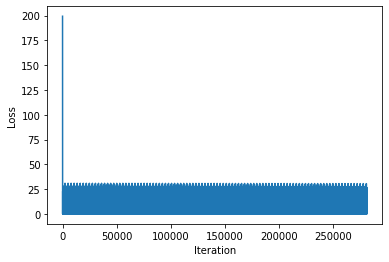

In [47]:
Error = np.array(Error)
x = np.arange(0, len(Error))

x=x.reshape(-1,1)
Error = Error.reshape(-1,1)
plt.plot(x, Error)
# plt.plot(x,c='red')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()


In [48]:
pred = model.predict(np.array([3]))
print(pred)

[[1.04517321]]
